In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Basic EDA steps

In [4]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data[data.duplicated()].shape

(0, 2)

<AxesSubplot:>

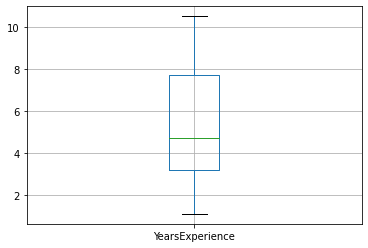

In [7]:
data.boxplot(column=['YearsExperience'])

<AxesSubplot:>

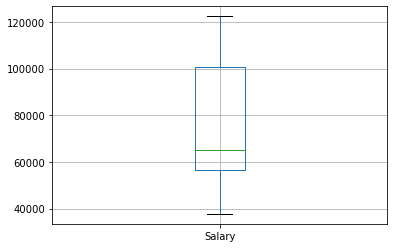

In [8]:
data.boxplot(column=['Salary'])

<AxesSubplot:>

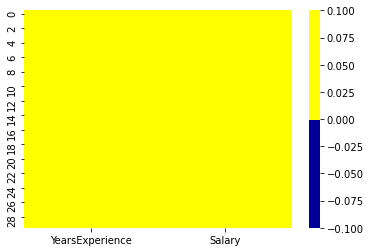

In [9]:
cols = data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing data. blue is non-missing data.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [10]:
data1 = data.rename({'YearsExperience': 'YoE'}, axis=1)

In [11]:
data1.head()

,YoE,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Simple Linear Regression

In [12]:
data1.corr()

,YoE,Salary
YoE,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YoE', ylabel='Density'>

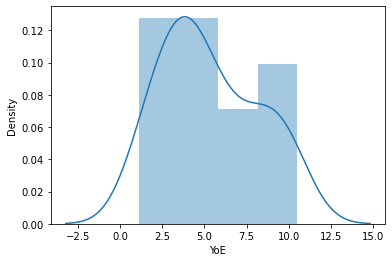

In [13]:
sns.distplot(data1['YoE'])

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

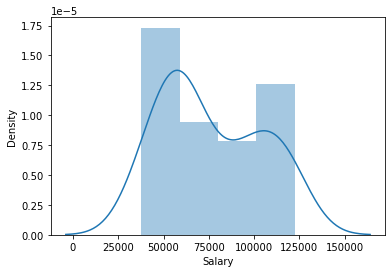

In [14]:
sns.distplot(data1['Salary'])

In [15]:
model = smf.ols("Salary~YoE",data = data1).fit()

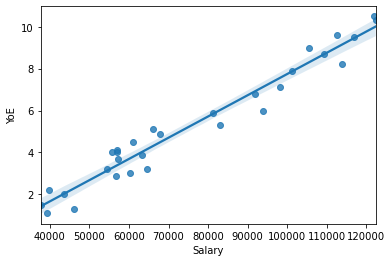

In [16]:
sns.regplot(x="Salary", y="YoE", data=data1);

In [17]:
#Coefficients
model.params

Intercept    25792.200199
YoE           9449.962321
dtype: float64

In [18]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    11.346940
YoE          24.950094
dtype: float64 
 Intercept    5.511950e-12
YoE          1.143068e-20
dtype: float64


In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Predict For New Data

In [20]:
newdata=pd.Series([11,12,14,18])

In [21]:
data_predict=pd.DataFrame(newdata,columns=['YoE'])

In [22]:
model.predict(data_predict)

0    129741.785735
1    139191.748056
2    158091.672699
3    195891.521985
dtype: float64

# Alternative Solution

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
df = pd.read_csv("Salary_Data.csv")

In [25]:
X = df.iloc[:, :-1].values 

In [26]:
y = df.iloc[:, 1].values 

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [28]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model_alt = LinearRegression()
model_alt.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Visualizing the Training set results
plt.scatter(X_train, y_train)
plt.plot(X_train, model_alt.predict(X_train), color = 'Red')
plt.title('Salary VS Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Visualizing the Test set results
plt.scatter(X_test, y_test)
plt.plot(X_train, model_alt.predict(X_train), color='Red')
plt.title('Salary VS Experience (Test set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
y_pred = model_alt.predict(X_test)
print(y_pred)